In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
print("Number of mice: ", num_mice)

Number of mice:  249


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

repr(duplicate_mice)


"array(['g989'], dtype=object)"

In [9]:
# Get all the data for the duplicate mouse ID
duplicate_mouse_data = merged_df[merged_df['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Checking the number of mice in the clean DataFrame
num_mice_clean = clean_df['Mouse ID'].nunique()
print("Number of mice after removing duplicates: ", num_mice_clean)


Number of mice after removing duplicates:  248


In [16]:
# Group by the 'Drug Regimen' column
grouped_df = clean_df.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the 'Tumor Volume (mm3)'
mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std_dev = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Group by drug regimen
grouped_df = clean_df.groupby("Drug Regimen")

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_mean = grouped_df["Tumor Volume (mm3)"].mean()
tumor_median = grouped_df["Tumor Volume (mm3)"].median()
tumor_variance = grouped_df["Tumor Volume (mm3)"].var()
tumor_std_dev = grouped_df["Tumor Volume (mm3)"].std()
tumor_sem = grouped_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame({"Mean": tumor_mean,
                           "Median": tumor_median,
                           "Variance": tumor_variance,
                           "Standard Deviation": tumor_std_dev,
                           "SEM": tumor_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


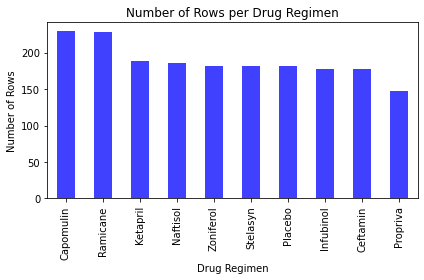

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
count_df.plot(kind='bar', color='blue', alpha=0.75)

plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.tight_layout()
plt.show()


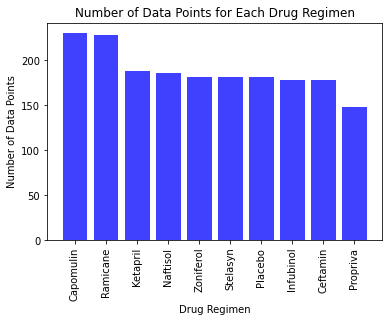

In [32]:
# Get the count of data points for each Drug Regimen
count_df = clean_df['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.bar(count_df.index.values, count_df.values, color="blue", alpha=0.75, align="center")

plt.title("Number of Data Points for Each Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)

plt.show()

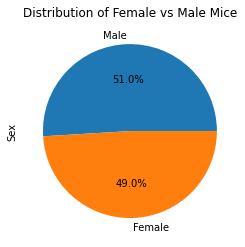

In [24]:
# Get the count of male vs female
sex_df = clean_df['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df.plot(kind="pie", autopct="%1.1f%%")

plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

plt.show()


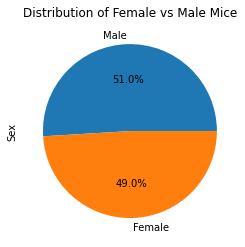

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df.values, labels=sex_df.index.values, autopct="%1.1f%%")

plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

plt.show()


In [26]:
# Get the last (greatest) timepoint for each mouse
max_timepoint_df = clean_df.groupby('Mouse ID').max()['Timepoint']

# Merge this with the original df to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, clean_df, on=("Mouse ID","Timepoint"), how="left")


In [27]:
# Put treatments into a list for a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with the tumor volume data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # Append to tumor_vol_list
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


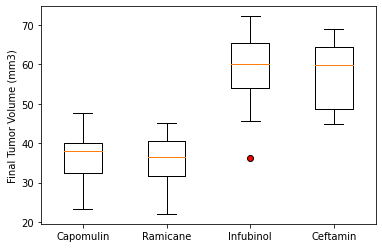

In [37]:
# Generate a box plot that shows the distribution of the final tumor volume for each treatment group.
red_circle = dict(markerfacecolor='r', marker='o')
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=red_circle)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

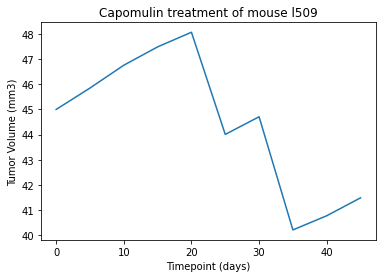

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID']== 'l509'] # Choose a mouse
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


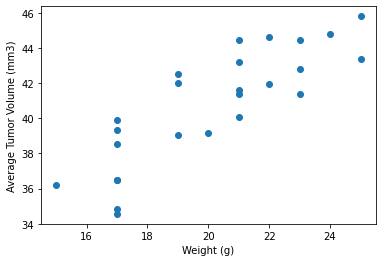

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


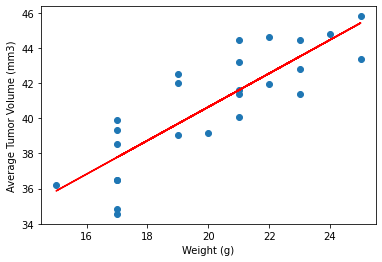

In [36]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
regress_values = capomulin_average['Weight (g)'] * slope + intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
